<a href="https://colab.research.google.com/github/subhashraj3031/AlmaBetter_Project/blob/main/Capstone_Project_Exploratory_Data_Analysis_Corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name**  -

$\color{White}{\text{Exploratory Data}}$

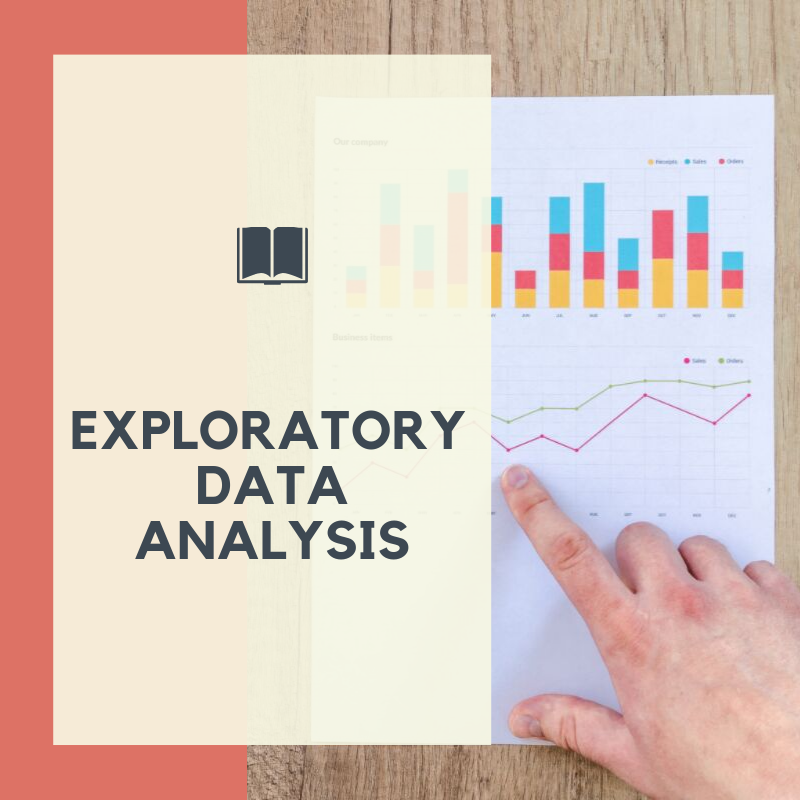

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**-  $\color{White}{\text{Subhash Puri}}$

**Project Summary: Exploratory Data Analysis (EDA) for Credit Score Classification**

**Project Overview:**

Paisabazaar is a leading financial services platform that helps individuals compare and access a wide range of credit and banking products. A key challenge in this domain is accurately evaluating a customer’s creditworthiness to minimize default risk while ensuring fair and efficient loan approvals

This project focuses on conducting Exploratory Data Analysis (EDA) on customer credit data to uncover meaningful patterns, trends, and relationships that influence credit score classification into three categories: Poor, Standard, and Good. The analysis aims to transform raw financial data into actionable insights that can support data-driven credit risk assessment.


**Dataset Description**

The dataset contains customer-level financial and credit-related information, including:

1. Demographic attributes (age, occupation, etc.)

2. Income and expense indicators

3. Credit behavior metrics (number of loans, credit utilization ratio)

4. Repayment history and delays

5. Existing debt and outstanding balances

6. Credit mix and tenure

**The target variable is Credit Score Category classified as:**

1. Poor

2. Standard

3. Good

**Problem Statement**

Financial institutions rely heavily on credit scores to make lending decisions. However, credit scores are influenced by multiple financial and behavioral factors such as income stability, debt levels, repayment history, and credit utilization. The objective of this project is to analyze these variables in depth and identify the key drivers that impact credit score categories, enabling better classification and risk evaluation.


**Business Objective**

The primary business objective is to assist Paisabazaar in:

1. Reducing loan default risk by identifying high-risk customer segments early

2. Improving credit decision accuracy through data-backed insights

3. Enhancing customer segmentation for personalized credit product recommendations

4. Supporting future predictive modeling for automated credit score classification

# **GitHub Link -**


https://github.com/subhashraj3031/AlmaBetter_Project


In [7]:
## Importing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
plt.style.use('default')

**Loading Dataset**

In [8]:
## Loadning dataset
df =pd.read_csv("/dataset.csv")
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


** Basic Data Inspection**

In [9]:
df.shape

(30752, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        30752 non-null  int64  
 1   Customer_ID               30752 non-null  int64  
 2   Month                     30752 non-null  int64  
 3   Name                      30752 non-null  object 
 4   Age                       30752 non-null  float64
 5   SSN                       30752 non-null  float64
 6   Occupation                30752 non-null  object 
 7   Annual_Income             30752 non-null  float64
 8   Monthly_Inhand_Salary     30752 non-null  float64
 9   Num_Bank_Accounts         30752 non-null  float64
 10  Num_Credit_Card           30752 non-null  float64
 11  Interest_Rate             30752 non-null  float64
 12  Num_of_Loan               30752 non-null  float64
 13  Type_of_Loan              30752 non-null  object 
 14  Delay_

In [11]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,30752.000000,30752.000000,30752.000000,30752.000000,3.075200e+04,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000
mean,28695.500000,25911.427419,4.500000,33.293900,4.965163e+08,51452.338896,4272.803815,5.342157,5.542176,14.353538,3.536681,20.983578,13.248179,10.340916,5.803525,1405.231834,32.313763,222.971547,109.741482,56.251402,394.220171
std,13316.222867,14403.521607,2.291325,10.743015,2.923992e+08,38753.552423,3215.873967,2.633819,2.056622,8.770756,2.430970,14.588513,6.262072,6.560260,3.914009,1166.272792,5.143613,99.014261,135.007678,39.880313,202.734875
min,5634.000000,1006.000000,1.000000,14.000000,6.304420e+05,7006.520000,333.596667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.230000,20.000000,1.000000,0.000000,0.000000,0.103402
25%,17164.750000,13938.750000,2.750000,25.000000,2.399003e+08,19653.458750,1659.141667,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.310000,3.000000,541.220000,28.039075,148.000000,29.765763,28.198631,268.576096
50%,28695.500000,25455.000000,4.500000,33.000000,4.905724e+08,38006.490000,3156.119167,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.230000,5.000000,1124.765000,32.330151,221.000000,66.900526,46.350929,335.152891
75%,40226.250000,38617.250000,6.250000,42.000000,7.517744e+08,73088.410000,6078.748333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.540000,9.000000,1878.490000,36.564428,304.000000,151.978850,72.443600,465.412448
max,51757.000000,50992.000000,8.000000,56.000000,9.999573e+08,179987.280000,14978.336667,10.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1705.000000,434.191089,1183.930696


In [12]:
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


In [13]:
df.tail(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30750,51756,12335,7,Alistair Barri,30.0,971088220.0,Accountant,88714.41,7504.8675,4.0,4.0,12.0,1.0,Mortgage Loan,0.0,3.0,9.12,3.0,Good,643.75,31.027707,191.0,No,47.817248,71.359231,Low_spent_Large_value_payments,580.407937,Good
30751,51757,12335,8,Alistair Barri,30.0,971088220.0,Accountant,88714.41,7504.8675,4.0,4.0,12.0,1.0,Mortgage Loan,0.0,3.0,9.12,3.0,Good,643.75,22.838403,192.0,No,47.817248,71.359231,High_spent_Small_value_payments,446.341711,NaN


In [14]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [15]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,30752.000000,30752.000000,30752.000000,30752,30752.000000,3.075200e+04,30752,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752.000000,30752,30752.000000,30752.000000,30752.000000,30752.000000,30752,30752.000000,30752.000000,30752.000000,30752,30752.000000,30752.000000,30752,30752.000000,30751
unique,NaN,NaN,NaN,3589,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,2250,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Nate Raymondw,NaN,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,40,NaN,NaN,2200,NaN,NaN,NaN,NaN,NaN,NaN,3496,NaN,NaN,NaN,NaN,13848,NaN,NaN,NaN,16056,NaN,NaN,8739,NaN,16258
mean,28695.500000,25911.427419,4.500000,NaN,33.293900,4.965163e+08,NaN,51452.338896,4272.803815,5.342157,5.542176,14.353538,3.536681,NaN,20.983578,13.248179,10.340916,5.803525,NaN,1405.231834,32.313763,222.971547,NaN,109.741482,56.251402,NaN,394.220171,NaN
std,13316.222867,14403.521607,2.291325,NaN,10.743015,2.923992e+08,NaN,38753.552423,3215.873967,2.633819,2.056622,8.770756,2.430970,NaN,14.588513,6.262072,6.560260,3.914009,NaN,1166.272792,5.143613,99.014261,NaN,135.007678,39.880313,NaN,202.734875,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,6.304420e+05,NaN,7006.520000,333.596667,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.500000,0.000000,NaN,1.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.103402,NaN
25%,17164.750000,13938.750000,2.750000,NaN,25.000000,2.399003e+08,NaN,19653.458750,1659.141667,3.000000,4.000000,7.000000,2.000000,NaN,10.000000,9.000000,5.310000,3.000000,NaN,541.220000,28.039075,148.000000,NaN,29.765763,28.198631,NaN,268.576096,NaN
50%,28695.500000,25455.000000,4.500000,NaN,33.000000,4.905724e+08,NaN,38006.490000,3156.119167,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.230000,5.000000,NaN,1124.765000,32.330151,221.000000,NaN,66.900526,46.350929,NaN,335.152891,NaN
75%,40226.250000,38617.250000,6.250000,NaN,42.000000,7.517744e+08,NaN,73088.410000,6078.748333,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.540000,9.000000,NaN,1878.490000,36.564428,304.000000,NaN,151.978850,72.443600,NaN,465.412448,NaN


**Understanding Columns**

Dataset Features

Demographic:

Age,
Occupation,
Annual_Income,
Monthly_Inhand_Salary,

**Credit Behaviour**

Num_Bank_Accounts,
Num_Credit_Card,
Outstanding_Debt,
Credit_Utilization_Ratio,
Credit_Mix

**Payment Behaviour**

Delay_from_due_date,
Num_of_Delayed_Payment,
Payment_of_Min_Amount,
Total_EMI_per_month,
Payment_Behaviour

**Target Variable**

Credit_Score (Good / Standard / Poor)

In [16]:
## Remove irrevant columns
df.drop(columns=['ID','Customer_ID',"Name",'SSN'], inplace=True)
print(df.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


In [17]:
## Missing Values
df.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,0


In [18]:
## Handling Missing Values

# Numerical - Median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

## Categoricals - Mode
cat_cols = df.select_dtypes(include = "object").columns
for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

  ## Check Missing Values
  print(df.isnull().sum())


Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                1
dtype: int64
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                

/tmp/ipython-input-2532811009.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


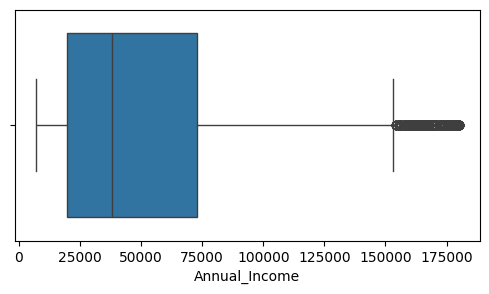

In [19]:
## out;ier detection

## Anual Income
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Annual_Income'])
plt.show()

In [20]:
## outlier Treatment (IQR)

Q1 = df['Annual_Income'].quantile(0.25)
Q3 = df['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['Annual_Income'] >=Q1 -1.5*IQR) & (df['Annual_Income']<=Q3 + 1.5*IQR)]

print(df.shape)
print(IQR)

## High income outlier may represent premium customers


(30184, 24)
53434.95125


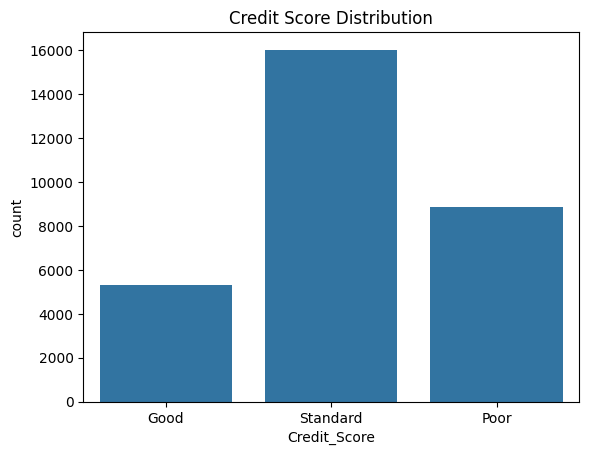

In [21]:
## Universal Analysis

sns.countplot(x='Credit_Score',data=df)
plt.title('Credit Score Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

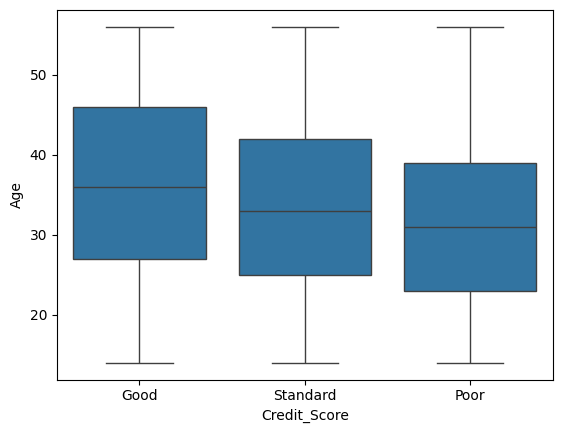

In [22]:
## Age Vs Credit Score

sns.boxplot(x='Credit_Score',y='Age',data=df)
plt.show

## Younger Customers tend to have lower Scores..

<function matplotlib.pyplot.show(close=None, block=None)>

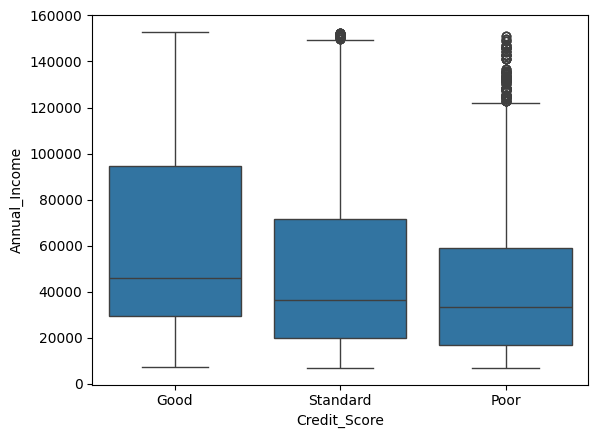

In [23]:
## Income VS Credit Score

sns.boxplot(x='Credit_Score',y='Annual_Income',data=df)
plt.show

## Income alone does note ensure good credit.



<function matplotlib.pyplot.show(close=None, block=None)>

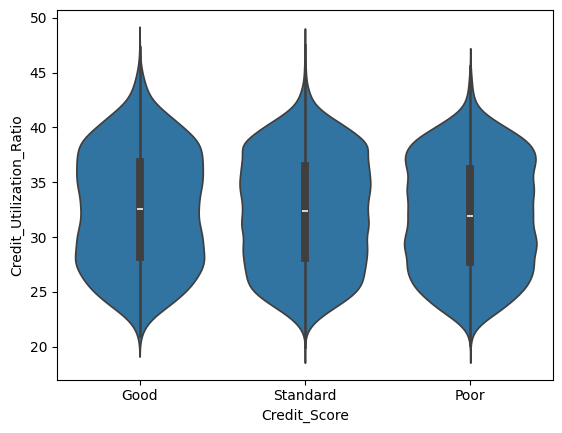

In [24]:
## Credit Utilization Analysis

sns.violinplot(x='Credit_Score',y='Credit_Utilization_Ratio',data=df)
plt.show

## High Utilization --> Poor Credit Score..


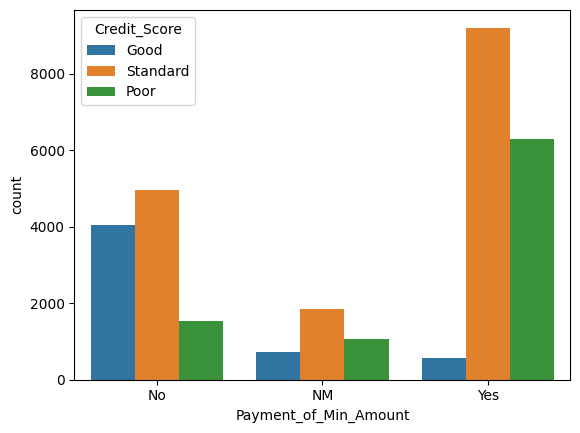

In [25]:
## Payment Behaviour Impact

sns.countplot(x='Payment_of_Min_Amount', hue= 'Credit_Score', data=df)

plt.show()

### Customer Skipping Small Payments are high risk..


In [26]:
### Interactive plot

fig = px.scatter(
    df,
    x='Annual_Income',
    y='Outstanding_Debt',
    color='Credit_Score',
    title='Annual Income vs Outstanding Debt'
)
fig.show()

**Key Insight**


*   Payment delays strongly affect credit score.
*   High credit utilization leads to poor score
*   Income alone is not a strong prediction
*   Payment discipline is the strongest Indicators


**Solution to Business Objective**

PaisaBajar Should Be:
*   Track Payment behavior Closely
*   Penelize high credit utilizations
*   Use early warning systems for delays payments
*   Offer customized products based on risk profile











**Conclusion**

EDA revealed that responsible credit behavior is more important than income level. This analysis provides a strong foundation for predictive credit scoring models.